In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999
color = sns.color_palette()
from pandas.plotting import lag_plot

In [2]:
#load the files
test = pd.read_csv("D:/Coursera/data/test.csv", index_col=False)
items = pd.read_csv("D:/Coursera/data/items.csv", index_col=False)
shops = pd.read_csv("D:/Coursera/data/shops.csv", index_col = False)
sales_train = pd.read_csv("D:/Coursera/data/sales_train_v2.csv", index_col=False)
item_categories = pd.read_csv("D:/Coursera/data/item_categories.csv", index_col = False)

In [3]:
train = sales_train.groupby(['date_block_num','shop_id','item_id'], as_index=False).agg({'item_cnt_day':'sum','item_price':['mean','min','max','median','std','var']})
train.columns = ['date_block_num', 'shop_id','item_id','item_cnt_month', 'item_price_mean','item_price_min','item_price_max','item_price_median','item_price_std','item_price_var']
train['item_price_diff'] = train.item_price_max = train.item_price_min
train.item_cnt_month = np.clip(train.item_cnt_month, 0, 20)

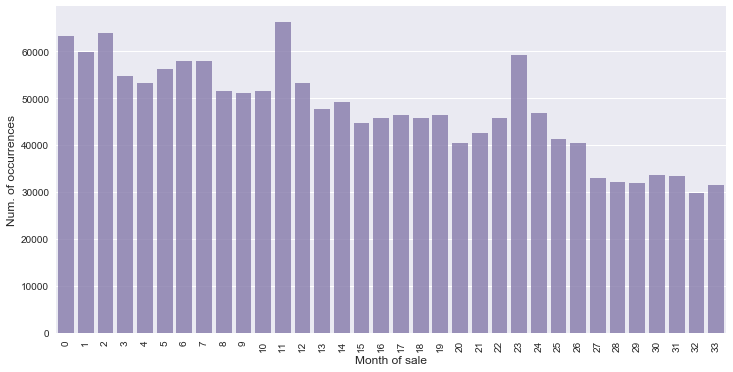

In [4]:
cnt_srs = train.date_block_num.value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.xticks(rotation='vertical')
plt.xlabel('Month of sale', fontsize=12)
plt.ylabel('Num. of occurrences', fontsize=12)
plt.show()

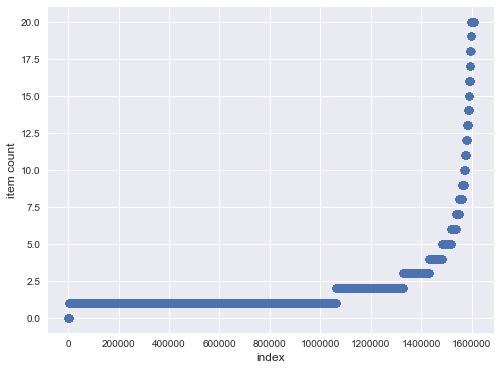

In [5]:
plt.figure(figsize=(8,6))
plt.scatter(range(train.shape[0]), np.sort(train.item_cnt_month.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('item count', fontsize=12)
plt.show()

In [6]:
train.dtypes

date_block_num         int64
shop_id                int64
item_id                int64
item_cnt_month       float64
item_price_mean      float64
item_price_min       float64
item_price_max       float64
item_price_median    float64
item_price_std       float64
item_price_var       float64
item_price_diff      float64
dtype: object

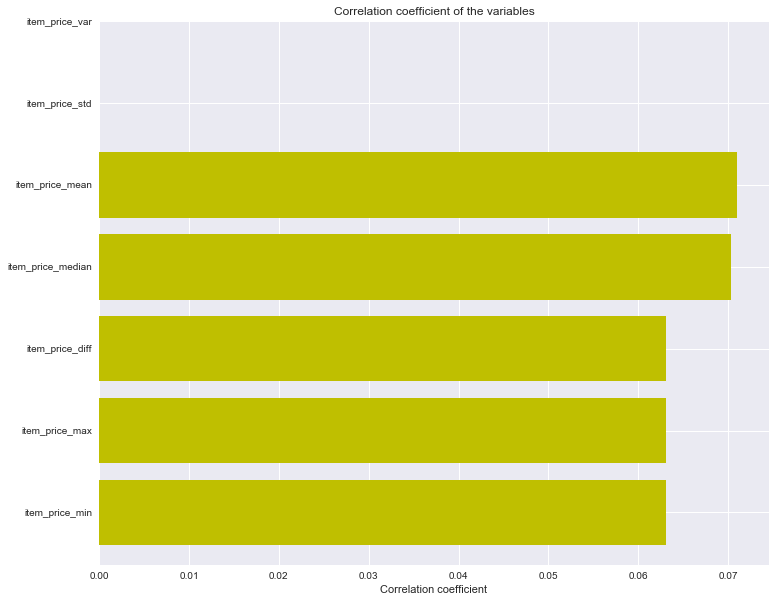

In [28]:
x_cols = [col for col in train.columns if col not in ['item_cnt_month'] if train[col].dtype=='float64']

labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(train[col].values, train.item_cnt_month.values)[0,1])
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by='corr_values')
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,10))
rects = ax.barh(ind, np.array(corr_df.corr_values.values), color='y')
ax.set_yticks(ind)
ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient of the variables")
#autolabel(rects)
plt.show()

In [31]:
corr_df_sel = corr_df.loc[(corr_df['corr_values']>0.02) | (corr_df['corr_values'] < -0.01)]
corr_df_sel

,col_labels,corr_values
1,item_price_min,0.063066
2,item_price_max,0.063066
6,item_price_diff,0.063066
3,item_price_median,0.070289
0,item_price_mean,0.070958


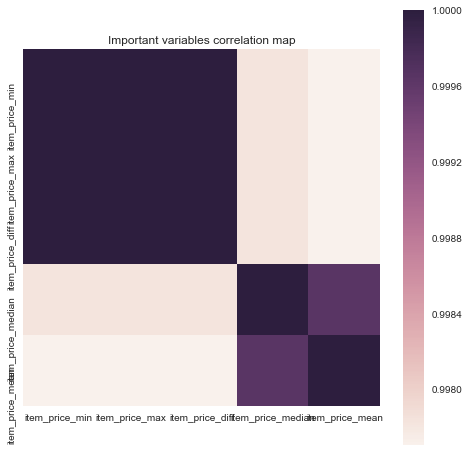

In [34]:
cols_to_use = corr_df_sel.col_labels.tolist()

temp_df = train[cols_to_use]
corrmat = temp_df.corr(method='spearman')
f, ax = plt.subplots(figsize=(8, 8))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=1., square=True)
plt.title("Important variables correlation map", fontsize=12)
plt.show()

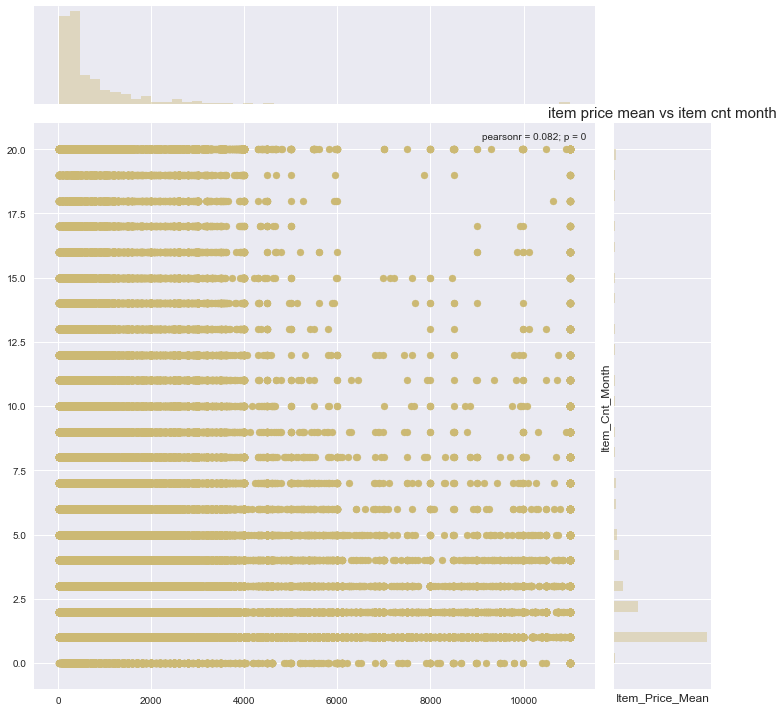

In [36]:
col = "item_price_mean"
ulimit = np.percentile(train[col].values, 99.5)
llimit = np.percentile(train[col].values, 0.5)
train[col].loc[train[col]>ulimit] = ulimit
train[col].loc[train[col]<llimit] = llimit

plt.figure(figsize=(12,12))
sns.jointplot(x=train.item_price_mean.values, y=train.item_cnt_month.values, size=10, color=color[4])
plt.ylabel('Item_Cnt_Month', fontsize=12)
plt.xlabel('Item_Price_Mean', fontsize=12)
plt.title("item price mean vs item cnt month", fontsize=15)
plt.show()

In [23]:
x = train[['date_block_num','shop_id','item_id','item_cnt_month']]

In [27]:
y = pd.DataFrame(x.groupby(['shop_id','item_id']).agg({'date_block_num':'count'}))

In [30]:
y[(y.date_block_num == 34)]

date_block_num
shop_id item_id                
6       2308                 34
        5822                 34
        5823                 34
        17717                34
7       2308                 34
        4244                 34
        5822                 34
12      482                  34
        839                  34
        11365                34
        11369                34
        11370                34
        11373                34
14      5821                 34
        5822                 34
15      2308                 34
        2808                 34
        5822                 34
        5823                 34
        7894                 34
16      5643                 34
        5822                 34
18      5821                 34
        5822                 34
        17717                34
19      5821                 34
        5822                 34
        7894                 34
22      464                  34
        482                  34
...                         ...
31      10331                34
        12550                34
        12552                34
        13881                34
        15450                34
        15458                34
        18672                34
35      5822                 34
38      3076                 34
        7894                 34
        17717                34
42      2308                 34
        5822                 34
        7856                 34
        7894                 34
44      5822                 34
        22087                34
        22088                34
46      2308                 34
        5821                 34
        5822                 34
        7894                 34
47      2308                 34
50      5822                 34
52      1905                 34
        2416                 34
        5822                 34
53      2308                 34
        5822                 34
56      7856                 34

[102 rows x 1 columns]

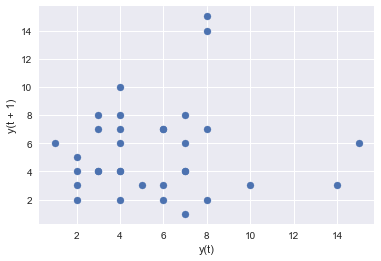

In [46]:
xx = train[(train.shop_id == 56) & (train.item_id == 7856)][['date_block_num','item_cnt_month']]
xx = xx.set_index('date_block_num')
lag_plot(xx.item_cnt_month)
plt.show()

In [7]:
train.head()

,date_block_num,shop_id,item_id,item_cnt_month,item_price_mean,item_price_min,item_price_max,item_price_median,item_price_std,item_price_var,item_price_diff
0,0,0,32,6.0,221.0,221.0,221.0,221.0,0.00000,0.0,221.0
1,0,0,33,3.0,347.0,347.0,347.0,347.0,0.00000,0.0,347.0
2,0,0,35,1.0,247.0,247.0,247.0,247.0,NaN,NaN,247.0
3,0,0,43,1.0,221.0,221.0,221.0,221.0,NaN,NaN,221.0
4,0,0,51,2.0,128.5,127.0,127.0,128.5,2.12132,4.5,127.0


In [4]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [5]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [6]:
vect.fit(items.item_name)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [7]:
vect.get_feature_names()

['00',
 '000',
 '00002',
 '00003',
 '00005',
 '00006',
 '00007',
 '00008',
 '00009h',
 '00010',
 '00011',
 '00012',
 '00013',
 '00014',
 '00015',
 '00016',
 '00017',
 '00018',
 '00019',
 '00020',
 '00021',
 '00022',
 '00024',
 '00028',
 '00029',
 '00032',
 '00036',
 '00038',
 '00039',
 '00046',
 '00052',
 '00053',
 '00055',
 '00059',
 '00061',
 '00062',
 '00076',
 '00077',
 '00082',
 '00095',
 '00097',
 '00110',
 '00114',
 '00117',
 '00119',
 '00120',
 '00121',
 '00122',
 '00146',
 '00149',
 '00160',
 '00194',
 '001u',
 '002',
 '00219',
 '00223',
 '00225',
 '00243',
 '00262',
 '00273',
 '00332',
 '00344',
 '00457',
 '005',
 '00544',
 '006',
 '007',
 '0076',
 '008',
 '0080',
 '0083',
 '0086',
 '01',
 '010445',
 '010520',
 '010735',
 '010759',
 '010827',
 '010964',
 '011138',
 '011374',
 '011732',
 '012012',
 '012197',
 '01233',
 '012456',
 '01610h',
 '01723',
 '01868',
 '01877',
 '01934',
 '01u',
 '02',
 '020809',
 '020815',
 '020818',
 '020908',
 '02703',
 '027e',
 '028e',
 '02u',
 '03

In [8]:
dtm = vect.transform(items.item_name)

In [10]:
print(dtm)

  (0, 8301)	1
  (0, 8330)	1
  (0, 12555)	1
  (0, 13801)	1
  (1, 263)	1
  (1, 1106)	1
  (1, 2674)	1
  (1, 2927)	1
  (1, 3068)	1
  (1, 4825)	1
  (1, 5035)	1
  (1, 8150)	1
  (1, 17586)	1
  (2, 6447)	1
  (2, 11716)	1
  (2, 15631)	1
  (3, 6429)	1
  (3, 8400)	1
  (3, 8877)	1
  (4, 11100)	1
  (4, 16060)	1
  (5, 6424)	1
  (5, 7137)	1
  (5, 8992)	1
  (5, 12937)	1
  :	:
  (22165, 4825)	1
  (22165, 8150)	1
  (22165, 16565)	1
  (22165, 17586)	1
  (22165, 18172)	1
  (22166, 475)	1
  (22166, 8150)	1
  (22166, 10007)	1
  (22166, 14252)	1
  (22166, 17586)	1
  (22166, 18176)	1
  (22167, 475)	1
  (22167, 1916)	1
  (22167, 10007)	1
  (22167, 14252)	1
  (22167, 17485)	1
  (22167, 18176)	1
  (22168, 3635)	1
  (22168, 4040)	1
  (22168, 9418)	1
  (22168, 18183)	1
  (22169, 9563)	1
  (22169, 10241)	1
  (22169, 14284)	1
  (22169, 18183)	1


In [12]:
type(dtm)

scipy.sparse.csr.csr_matrix

In [15]:
x = pd.DataFrame(dtm.toarray(), columns=vect.get_feature_names())

In [16]:
x.shape

(22170, 18222)

In [17]:
x.head()

,00,000,00002,00003,00005,00006,00007,00008,00009h,00010,00011,00012,00013,00014,00015,00016,00017,00018,00019,00020,00021,00022,00024,00028,00029,00032,00036,00038,00039,00046,00052,00053,00055,00059,00061,00062,00076,00077,00082,00095,00097,00110,00114,00117,00119,00120,00121,00122,00146,00149,00160,00194,001u,002,00219,00223,00225,00243,00262,00273,00332,00344,00457,005,00544,006,007,0076,008,0080,0083,0086,01,010445,010520,010735,010759,010827,010964,011138,011374,011732,012012,012197,01233,012456,01610h,01723,01868,01877,01934,01u,02,020809,020815,020818,020908,02703,027e,028e,02u,03,04,047e,05,051,05u,06,07,078e,08,08u,09,0946,10,100,1000,10000,100001,100002,100003,1000183,100025,100026,100027,1001,100101,100102,100103,100104,100105,100106,100107,100108,100109,100110,100111,100112,100113,100114,100115,1004,1005,1006,1007,1008,1008a,1008za01,100cm,101,1010,1011,1012,1013,1015,101501,101502,101503,101506,101513,101514,101515,101516,101517,101518,101519,101520,101521,101522,101523,101524,101525,101608,101609,101610,101611,1018,101900,101901,101903,101904,101908,101909,101910,101911,102304,103,1031,1032,1038,103e,104,1046,1047,1048,1049,105,1050,1051,1055,10575,1058,10584,1059,1065,107,1070,1071,107107,1080p,1080р,1082,108207,1085,10851,1087,1088,1089,10c,10cd,10dvd,10th,10см,10х10,10шт,11,110,1108a,1108za01,1111,1112,1113,1114,1118,1119,1123,1129,1131,1133,1136,1137,1141,1150,1151,1153,1155,1161,1162,1164,1176,118,1183,1188,1189,1190,1194,1197,1199,11bd,11cd,11dvd,11кл,11см,12,120,1200,1201,1202,1203,1204,1205,1208,1208a,1208b,123,1239,124,1240,1241,125,1251,1257,125см,1260,1269,127,1270,1272,1274,1278,1292,1294,1295,12cd,12dvd,12mo,12x,12см,12шт,13,1300,1303,1306,1307,1314,1315,131e,1327,1335,1339,1341,1342,13600,13610,138,1383,1384,1385,13851,1390,1392,1393,1394,1396,1397,13a,13cd,13lp,13th,13см,14,1404,1408,1413,1419,1424,1430,1433,1467,14810й,1483,1485,1487,1489,1490,1491,1492,1493,1494,1499,14cd,14см,15,1500,150th,1518,1528,153,1531,1576,159,15a,15au,15cd,15lp,15мб,15см,16,160,1600,162,165,16cd,16gb,16x,16см,16х,17,1700,1703,1725,1765,17cd,17lp,17см,18,180,1800,180gramm,1812,182,183,184,186,188,1886,188a,188ac,188c,188l,188lc,188p,18cd,18lp,18см,19,190a,1914,1922,1923,1924,1925,1927,1933,1935,1936,1938,1940,1941,1942,1943,19436,1944,1945,1946,1958,1959,1960,1962,1963,1964,1966,1967,1967г,1968,1969,1970,1971,1972,1973,1975,1976,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1989,1990,1991,1992,1993,1994,1995,1997,1998,19см,1a,1c,1dvd,1p,1pk,1tb,1user,1y,1yr,1г,1год,1мес,1пк,1с,1сшкола,1шт,20,200,2000,20000,2001,2002,2003,2004,2005,2007,2007г,2008,2008a,2008zr11,2009,201,2010,2011,2011г,2012,2013,...,чистого,чистота,чистый,чит,читаем,читает,читать,чкалов,чокнутые,чокнутый,чонкина,чт,чтение,чтения,чтец,чтиво,что,чтобы,чувак,чувств,чувства,чувство,чувствуя,чуд,чудаки,чудакова,чудес,чудеса,чудесное,чудесные,чудесный,чудо,чудовищ,чудовища,чудовищами,чудовищах,чудовище,чудотворец,чужестранец,чужие,чужими,чужих,чужой,чужому,чуковский,чуковского,чукотки,чукча,чукчей,чулимске,чулков,чулок,чумной,чумовой,чунга,чуть,чуча,чучело,чём,чёрная,чёрное,чёрные,чёрный,шабаш,шаболовке,шаг,шагаю,шаги,шагов,шагу,шаинский,шайба,шакал,шалуна,шалуны,шалунья,шальные,шаляпин,шамаханская,шамбалы,шанель,шанин,шанк,шанс,шансон,шансона,шансы,шаолинь,шапито,шапка,шапке,шапочка,шапочку,шар,шаре,шарик,шарлиз,шарлотта,шарль,шаровая,шарпей,шарф,шарфом,шатры,шатунов,шафер,шахиджанян,шахиджаняна,шахмат,шахматы,шахта,шахтер,шашки,швайгер,шварц,шварца,швейка,швейцария,шевели,шевченко,шедевров,шедевры,шейка,шейно,шейп,шекли,шекспир,шекспировские,шелег,шелк,шельма,шемякина,шендерович,шербургские,шерлок,шерлока,шерлоке,шерман,шермана,шерст,шерсть,шерше,шершень,шестеренчатый,шестой,шесть,шеф,шефер,шизострел,шизострела,шикарное,шимпанзе,шин,шиндлера,ширли,широка,широко,шк,шкатулка,шкаф,шкафу,шкид,шкипер,школа,школе,школу,школы,школьная,школьников,школьного,школьный,шкуре,шлем,шлягер,шлягеры,шляпа,шляпка,шнур,шнуров,шоковый,шоколад,шоколадная,шоколатор,шолохов,шо